### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
lista_alumnos = [["Pedro", 47, 1.80],
                 ["Tomás", 31, 1.80],
                 ["Ana", 39, 1.65],
                 ["Natalio", 29, 1.73],
                 ["Monica", 47, 1.73],
                 ["Jose", 24, 1.75],
                 ["Carolina", 34, 1.64],
                 ["Alberto", 36, 1.60],
                 ["Cristina", 46, 1.70],
                 ["Alba", 29, 1.68],
                 ["Laura", 40, 1.60],
                 ["Luis", 47, 1.69],
                 ["Jaime", 38, 1.60],
                 ["Fernando", 51, 1.75]]

In [3]:
lista_alumnos = pd.DataFrame(lista_alumnos)

In [4]:
lista_alumnos.head()

,0,1,2
0,Pedro,47,1.80
1,Tomás,31,1.80
2,Ana,39,1.65
3,Natalio,29,1.73
4,Monica,47,1.73


In [12]:
lista_alumnos.rename(columns={1:'Edad', 2: 'Altura'}, inplace=True)
lista_alumnos.head()

,0,Edad,Altura
0,Pedro,47,1.80
1,Tomás,31,1.80
2,Ana,39,1.65
3,Natalio,29,1.73
4,Monica,47,1.73


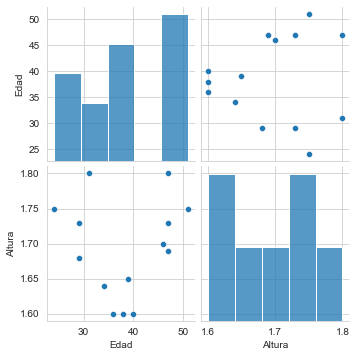

In [10]:
sns.pairplot(lista_alumnos);

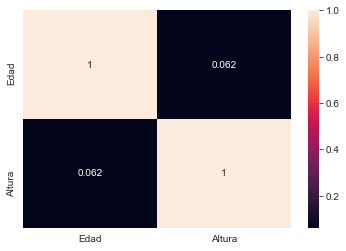

In [40]:
sns.heatmap(lista_alumnos.corr(), annot=True);

In [19]:
X = lista_alumnos[['Edad']]
y = lista_alumnos['Altura']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14, 1)
(9, 1)
(5, 1)
(9,)
(5,)


In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [24]:
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
coeff_df = pd.DataFrame(lm.coef_,
X.columns,
columns=['Coefficent'])
coeff_df

,Coefficent
Edad,0.000576


In [28]:
X_test

,Edad
9,29
11,47
0,47
12,38
5,24


In [30]:
nueva_altura = np.array([[15],[89]])

lm.predict(nueva_altura)

array([1.67494634, 1.71754146])

In [31]:
predictions = lm.predict(X_test)
predictions

array([1.68300488, 1.69336585, 1.69336585, 1.68818537, 1.68012683])

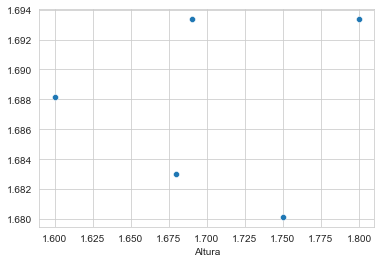

In [34]:
sns.scatterplot(y_test, predictions);

C:\Users\artur\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


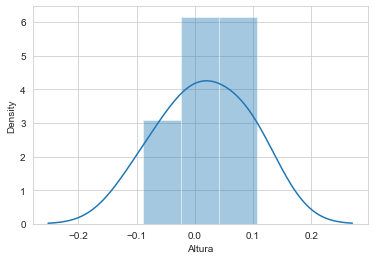

In [35]:
sns.distplot(y_test - predictions);

In [36]:
from sklearn import metrics

In [37]:
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 0.05421268292682928
MSE 0.004810023633551457
RMSE 0.06935433392046568


In [38]:
lm.score(X_train, y_train) * 100 # Entrenamiento

0.3841739322369975

In [39]:
lm.score(X_test, y_test) * 100  # Test

-4.930707538208079